**Problem :**

**a) Does price vary with Airlines?**

**b) How is the price affected when tickets are bought in just 1 or 2 days before departure?**

**c) Does ticket price change based on the departure time and arrival time?**

**d) How the price changes with change in Source and Destination?**

**e) How does the ticket price vary between Economy and Business class?**



In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Flight_Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
df.rename(columns={'Unnamed: 0': 'Sr.No'}, inplace=True)

In [6]:
df.head()

,Sr.No,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.shape

(300153, 12)

In [8]:
df.describe()

,Sr.No,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sr.No             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [10]:
df.isnull().sum()

Sr.No               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
print(df['stops'].unique())

['zero' 'one' 'two_or_more']


In [12]:
df.dtypes

Sr.No                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in Sr.No: [     0      1      2 ... 300150 300151 300152]
Unique values in airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique values in flight: ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
Unique values in source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Unique values in departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique values in stops: ['zero' 'one' 'two_or_more']
Unique values in arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Unique values in destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Unique values in class: ['Economy' 'Business']
Unique values in duration: [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.4

In [14]:
df['stops'] = df['stops'].replace({
    'zero': '0',
    'one': '1',
    'two_or_more': '2+'
})
df['stops'] = df['stops'].replace({'0': 0, '1': 1, '2+': 2}).astype(int)


In [15]:
# Map departure and arrival times to numerical values
time_mapping = {
    'Early_Morning': 1,
    'Morning': 2,
    'Afternoon': 3,
    'Evening': 4,
    'Night': 5,
    'Late_Night': 6
}

df['departure_time_num'] = df['departure_time'].map(time_mapping)
df['arrival_time_num'] = df['arrival_time'].map(time_mapping)

In [16]:
df.head()

,Sr.No,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_time_num,arrival_time_num
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,4,5
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,1,2
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,1,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,2,3
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,2,2


In [17]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Sr.No: [     0      1      2 ... 300150 300151 300152]
Unique values in airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique values in flight: ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
Unique values in source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Unique values in departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique values in stops: [0 1 2]
Unique values in arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Unique values in destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Unique values in class: ['Economy' 'Business']
Unique values in duration: [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 2

In [18]:
df['duration'] = df['duration'] * 60

In [19]:
df.head()

,Sr.No,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_time_num,arrival_time_num
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,130.2,1,5953,4,5
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,139.8,1,5953,1,2
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,130.2,1,5956,1,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,135.0,1,5955,2,3
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,139.8,1,5955,2,2


In [20]:
df.dtypes

Sr.No                   int64
airline                object
flight                 object
source_city            object
departure_time         object
stops                   int32
arrival_time           object
destination_city       object
class                  object
duration              float64
days_left               int64
price                   int64
departure_time_num      int64
arrival_time_num        int64
dtype: object

In [21]:
df = df.drop(columns=['flight'])

In [22]:
df.head()

,Sr.No,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_time_num,arrival_time_num
0,0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,130.2,1,5953,4,5
1,1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,139.8,1,5953,1,2
2,2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,130.2,1,5956,1,1
3,3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,135.0,1,5955,2,3
4,4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,139.8,1,5955,2,2


In [23]:
df.dtypes

Sr.No                   int64
airline                object
source_city            object
departure_time         object
stops                   int32
arrival_time           object
destination_city       object
class                  object
duration              float64
days_left               int64
price                   int64
departure_time_num      int64
arrival_time_num        int64
dtype: object

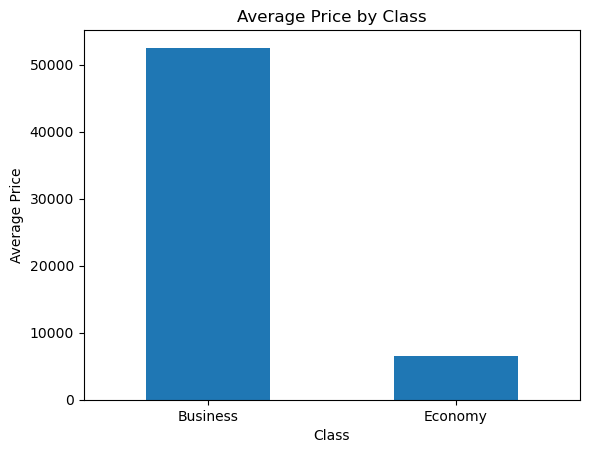

In [24]:
# Group the data by class and calculate the mean price
class_price = df.groupby('class')['price'].mean()

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bar graph
class_price.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Average Price by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Average Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Display the plot
plt.show()

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


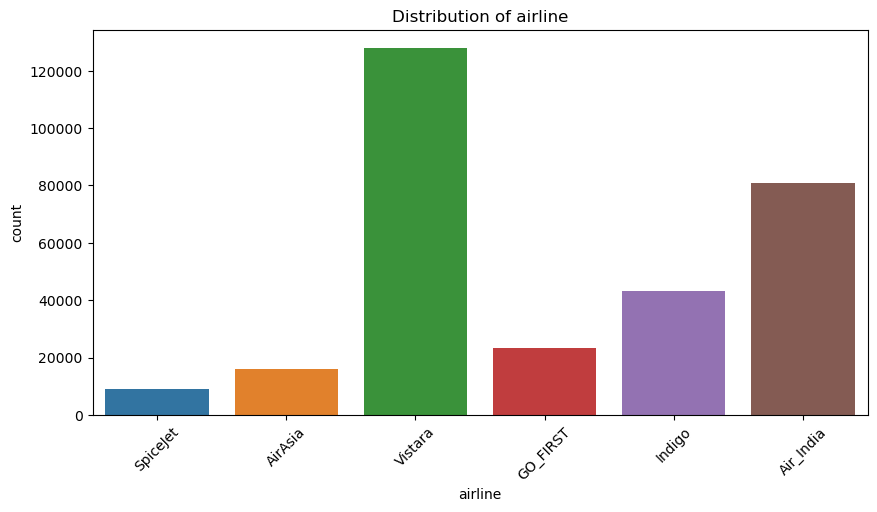

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


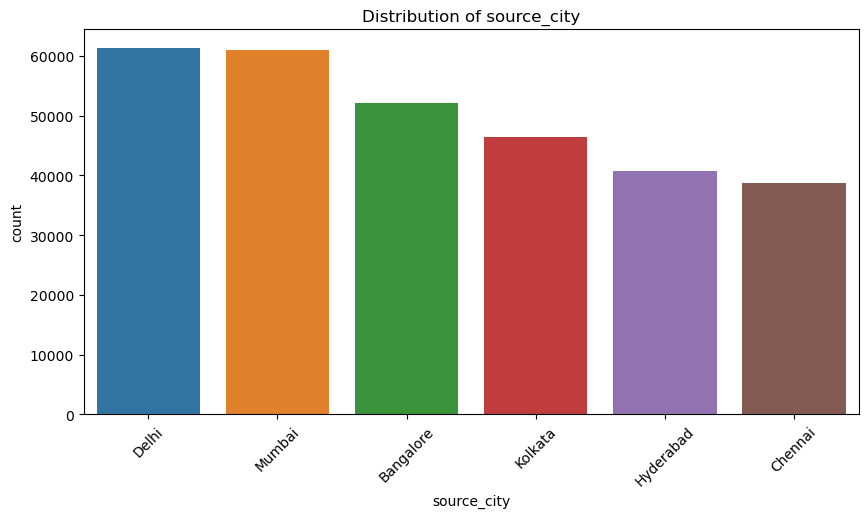

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


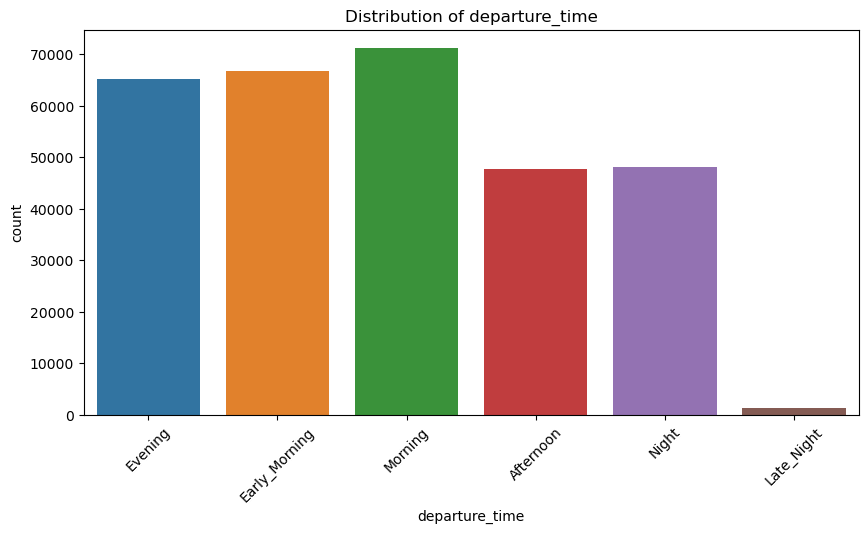

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


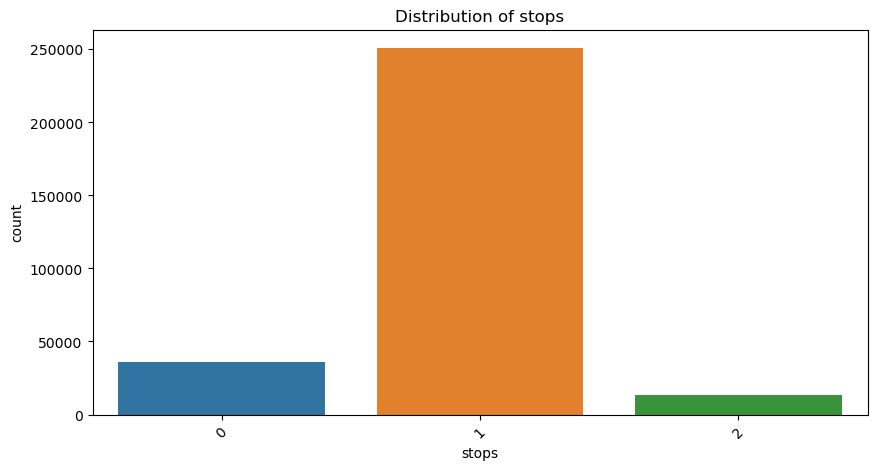

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


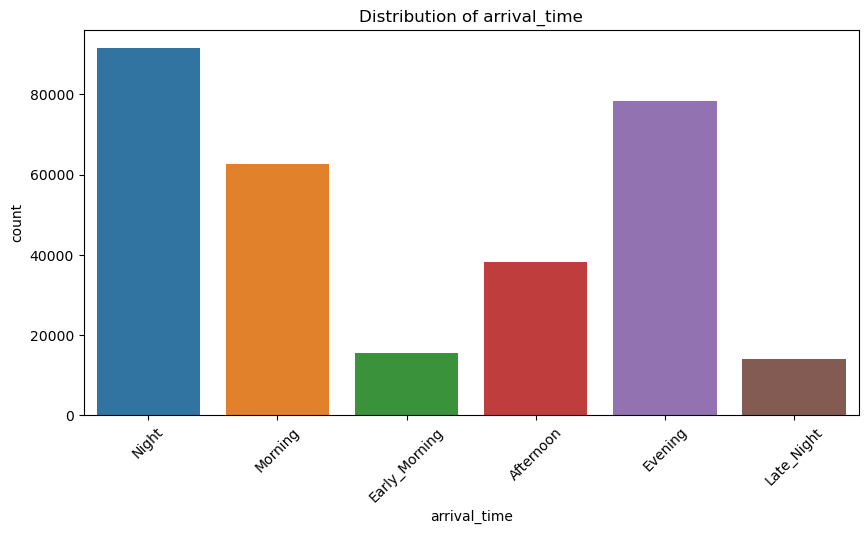

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


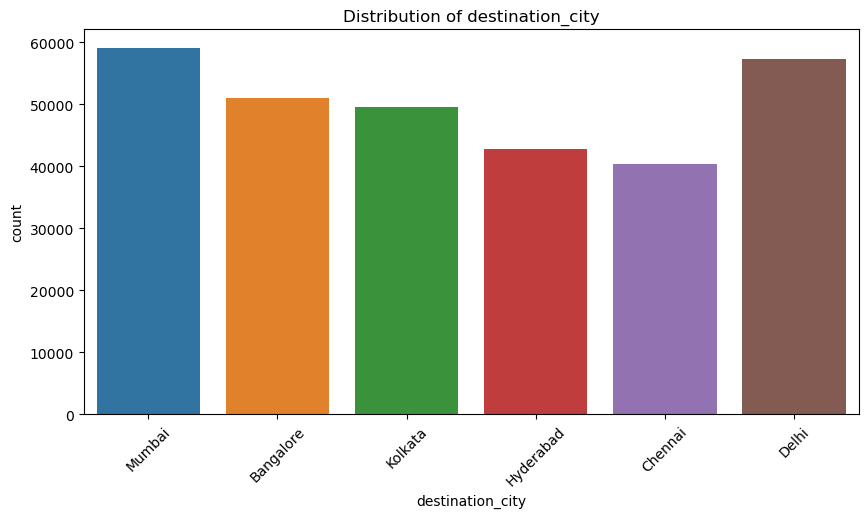

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


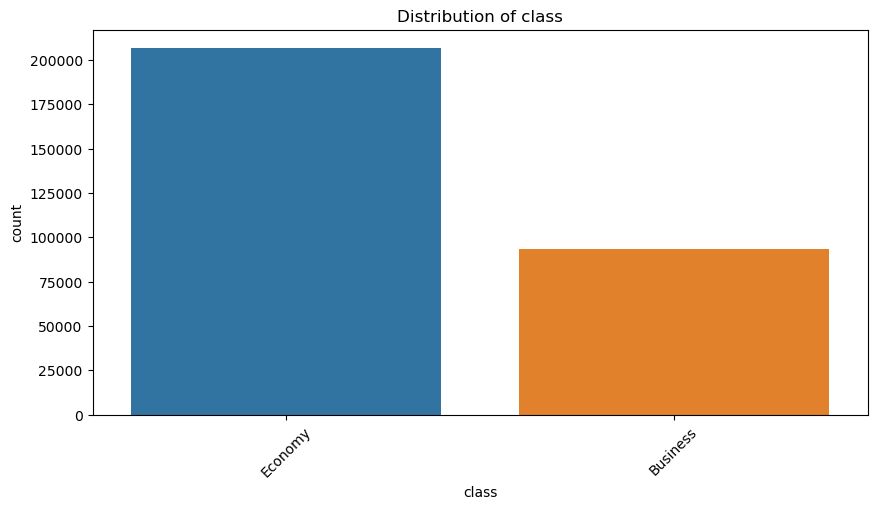

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


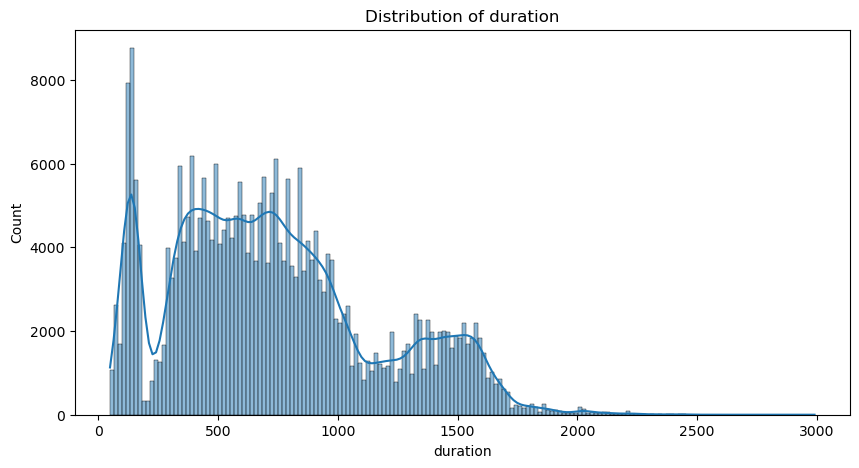

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


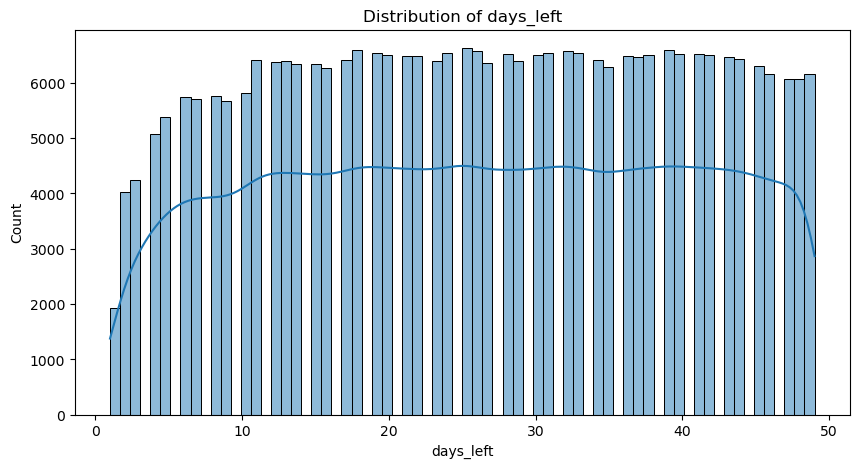

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


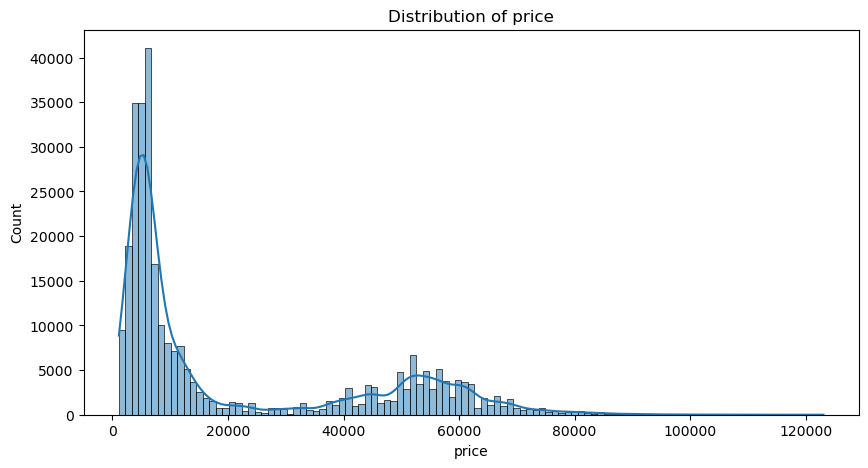

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical Features
categorical_features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Numerical Features
numerical_features = ['duration', 'days_left', 'price']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


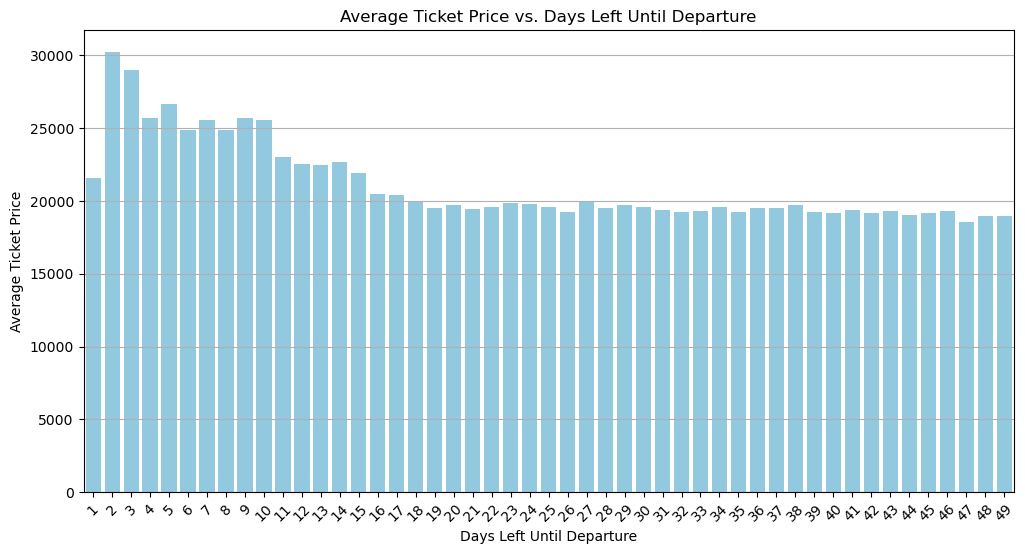

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by days_left and calculate the average ticket price for each group
avg_price_by_days_left = df.groupby('days_left')['price'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_days_left, x='days_left', y='price', color='skyblue')
plt.title('Average Ticket Price vs. Days Left Until Departure')
plt.xlabel('Days Left Until Departure')
plt.ylabel('Average Ticket Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


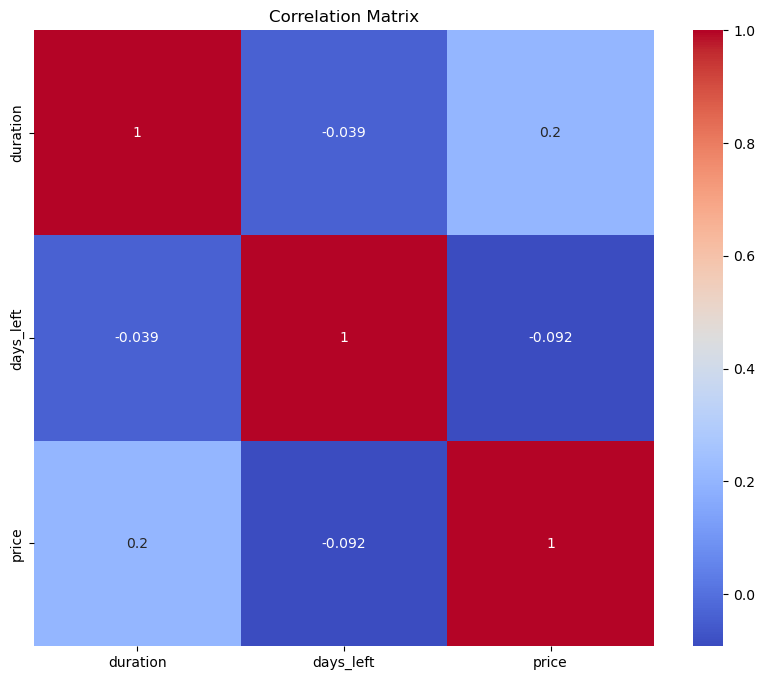

class          Business      Economy
airline                             
AirAsia             NaN  4091.072742
Air_India  47131.039212  7313.682169
GO_FIRST            NaN  5652.007595
Indigo              NaN  5324.216303
SpiceJet            NaN  6179.278881
Vistara    55477.027777  7806.943645


In [27]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pivot table for categorical features
pivot_table = df.pivot_table(values='price', index='airline', columns='class', aggfunc='mean')
print(pivot_table)



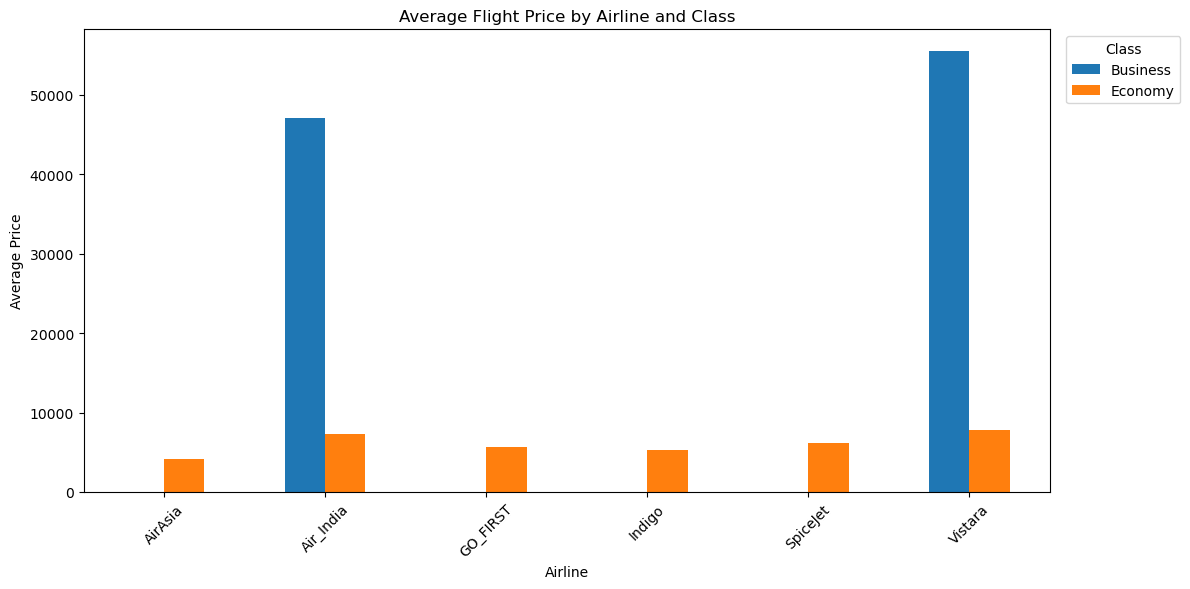

In [28]:
airline_class_price = df.groupby(['airline', 'class'])['price'].mean().unstack()

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar graph
airline_class_price.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Average Flight Price by Airline and Class')
ax.set_xlabel('Airline')
ax.set_ylabel('Average Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
ax.legend(title='Class', loc='upper left', bbox_to_anchor=(1.01, 1))

# Display the plot
plt.tight_layout()
plt.show()

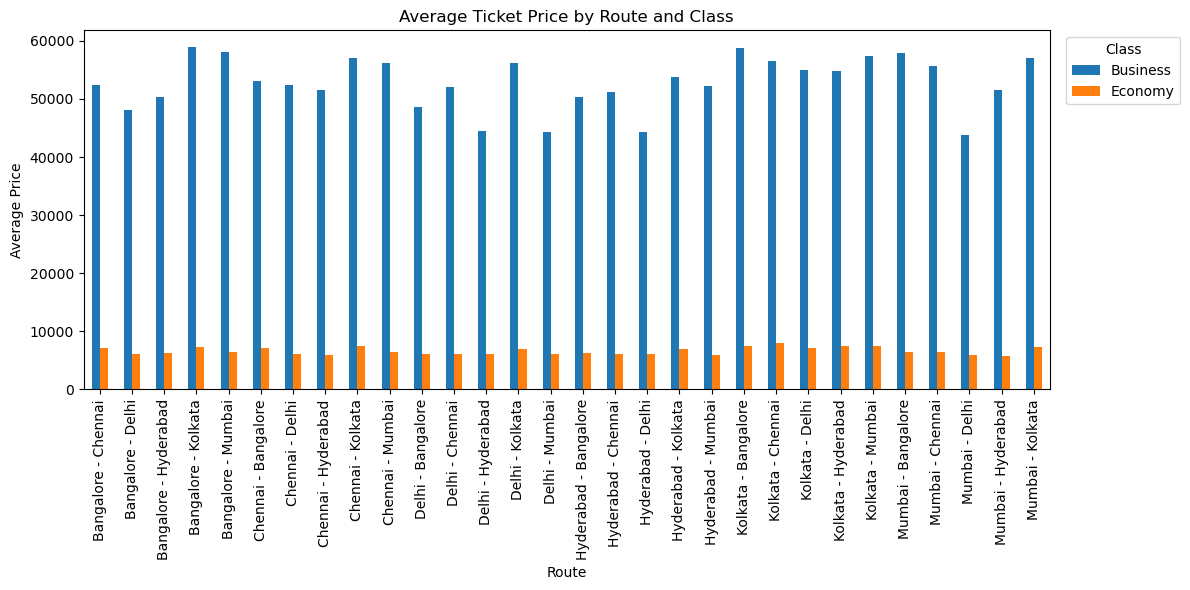

In [29]:
# Create a 'route' column by combining source_city and destination_city
df['route'] = df['source_city'] + ' - ' + df['destination_city']

# Group the data by route and class, and calculate the mean price
route_class_price = df.groupby(['route', 'class'])['price'].mean().unstack()

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar graph
route_class_price.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Average Ticket Price by Route and Class')
ax.set_xlabel('Route')
ax.set_ylabel('Average Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add a legend
ax.legend(title='Class', loc='upper left', bbox_to_anchor=(1.01, 1))

# Display the plot
plt.tight_layout()
plt.show()

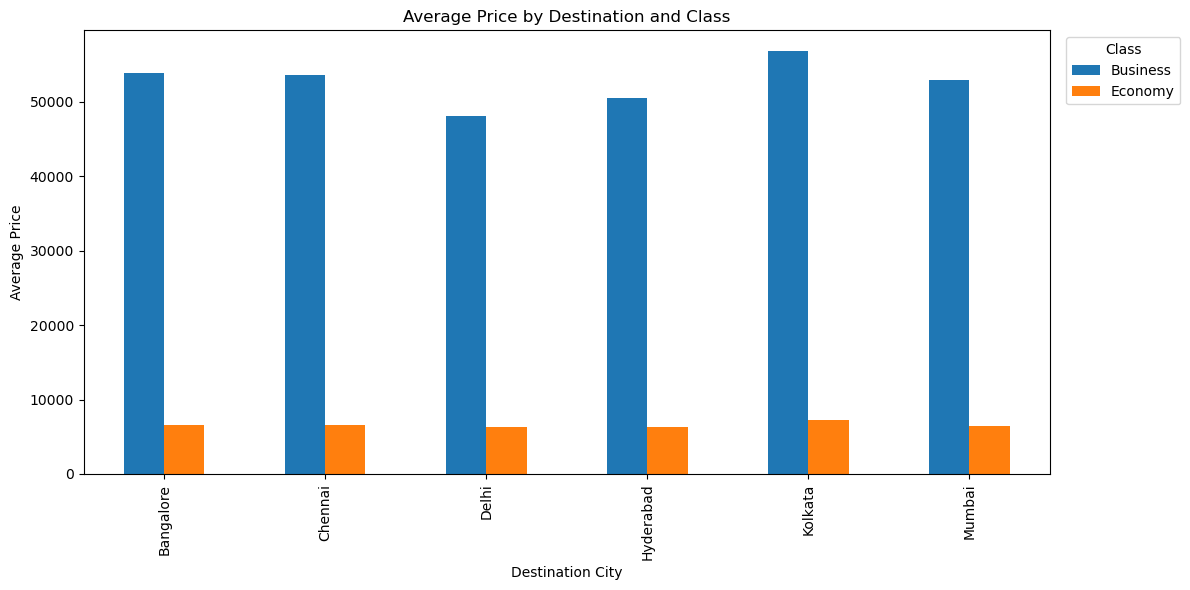

In [30]:
# Group the data by destination_city and class, and calculate the mean price
dest_class_price = df.groupby(['destination_city', 'class'])['price'].mean().unstack()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar graph
dest_class_price.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Average Price by Destination and Class')
ax.set_xlabel('Destination City')
ax.set_ylabel('Average Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add a legend
ax.legend(title='Class', loc='upper left', bbox_to_anchor=(1.01, 1))

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


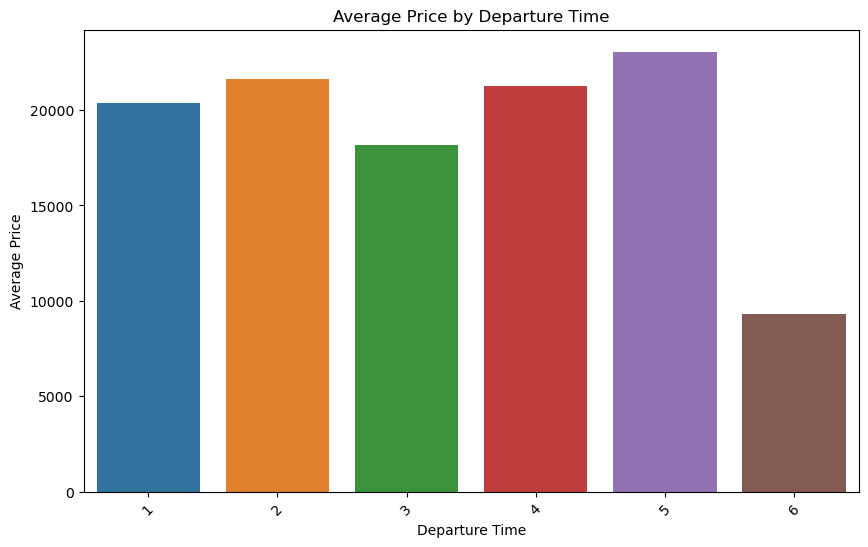

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average price for each departure time category
avg_price_by_departure_time = df.groupby('departure_time_num')['price'].mean().reset_index()

# Bar plot for average price by departure time
plt.figure(figsize=(10, 6))
sns.barplot(x='departure_time_num', y='price', data=avg_price_by_departure_time)
plt.title('Average Price by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


<Figure size 1500x800 with 0 Axes>

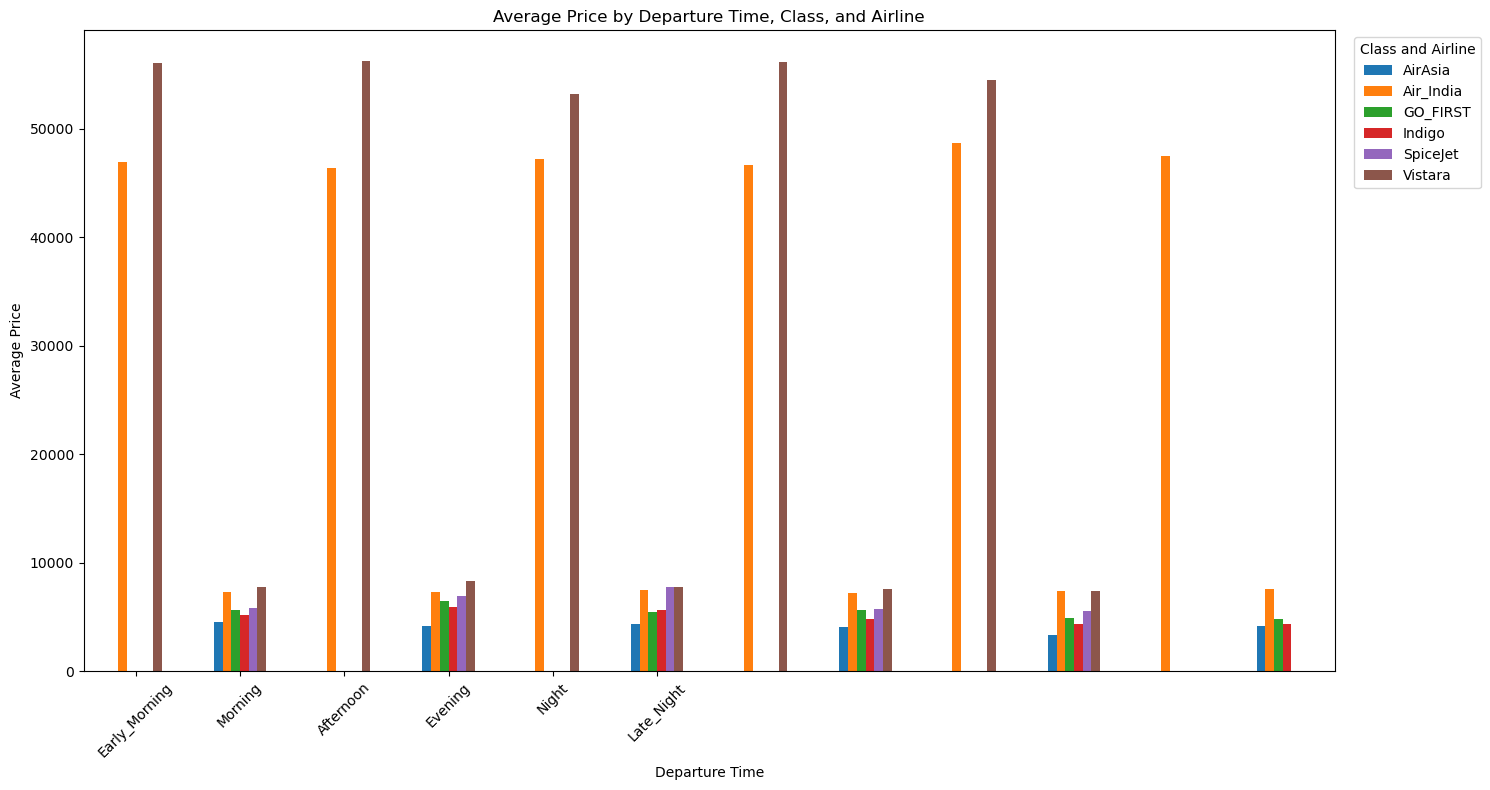

In [32]:
# Calculate the average price for each departure time, class, and airline
avg_price_by_departure_class_airline = df.groupby(['departure_time_num', 'class', 'airline'])['price'].mean().unstack().reset_index()

# Plot the joint bar graph
plt.figure(figsize=(15, 8))
avg_price_by_departure_class_airline.plot(kind='bar', x='departure_time_num', stacked=False, figsize=(15, 8))
plt.title('Average Price by Departure Time, Class, and Airline')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.xticks(ticks=range(6), labels=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'], rotation=45)
plt.legend(title='Class and Airline', loc='upper left', bbox_to_anchor=(1.01, 1))
plt.tight_layout()
plt.show()


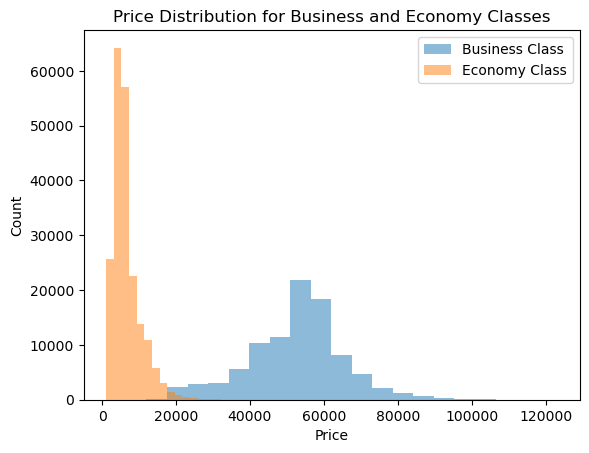

In [33]:
# Filter the data for business and economy classes
business_class = df[df['class'] == 'Business']
economy_class = df[df['class'] == 'Economy']

# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot the histogram for business class
ax.hist(business_class['price'], alpha=0.5, label='Business Class', bins=20)

# Plot the histogram for economy class
ax.hist(economy_class['price'], alpha=0.5, label='Economy Class', bins=20)

# Add legend and labels
ax.legend()
ax.set_xlabel('Price')
ax.set_ylabel('Count')
ax.set_title('Price Distribution for Business and Economy Classes')

# Display the plot
plt.show()

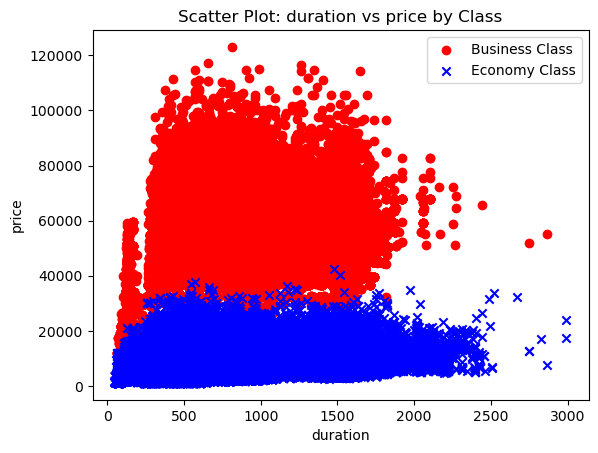

In [34]:
# Select the columns you want to plot
x_col = 'duration'
y_col = 'price'

# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot the scatter plot with different colors/markers for each class
business_class = df[df['class'] == 'Business']
economy_class = df[df['class'] == 'Economy']

ax.scatter(business_class[x_col], business_class[y_col], color='r', marker='o', label='Business Class')
ax.scatter(economy_class[x_col], economy_class[y_col], color='b', marker='x', label='Economy Class')

# Set the title and axis labels
ax.set_title(f'Scatter Plot: {x_col} vs {y_col} by Class')
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [35]:
df.head()

,Sr.No,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_time_num,arrival_time_num,route
0,0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,130.2,1,5953,4,5,Delhi - Mumbai
1,1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,139.8,1,5953,1,2,Delhi - Mumbai
2,2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,130.2,1,5956,1,1,Delhi - Mumbai
3,3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,135.0,1,5955,2,3,Delhi - Mumbai
4,4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,139.8,1,5955,2,2,Delhi - Mumbai


C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


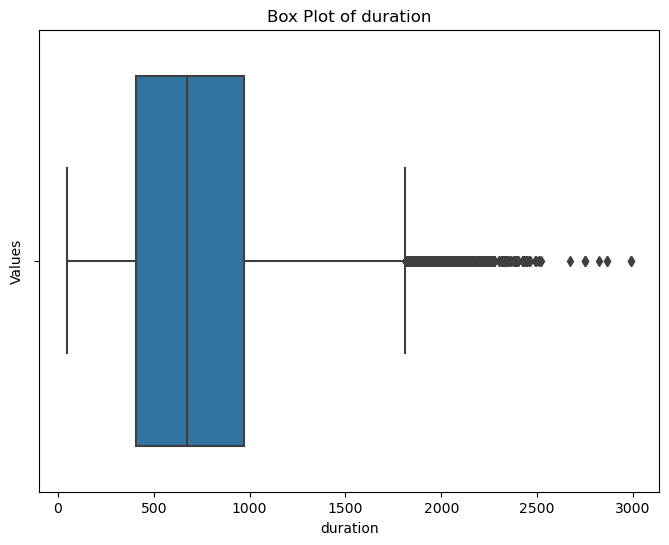

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


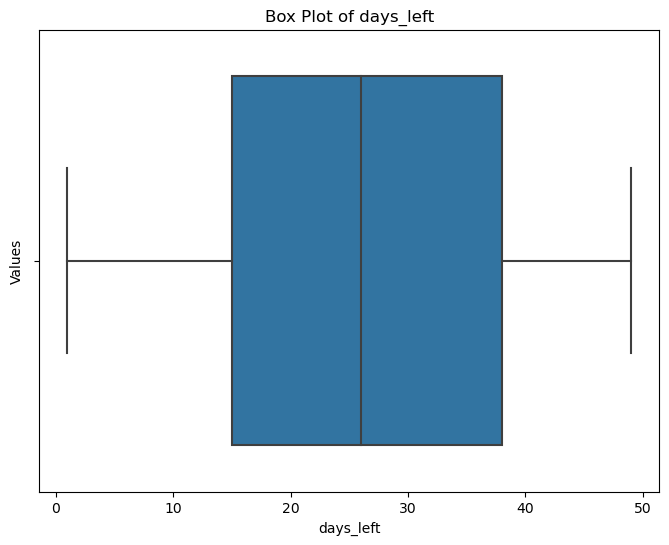

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


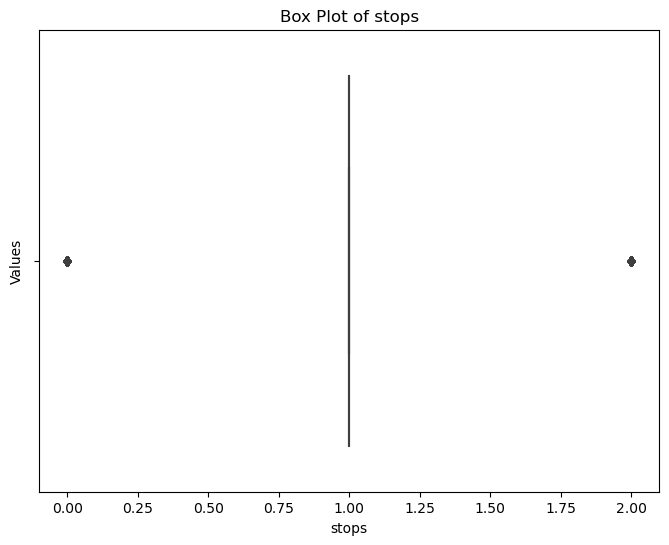

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


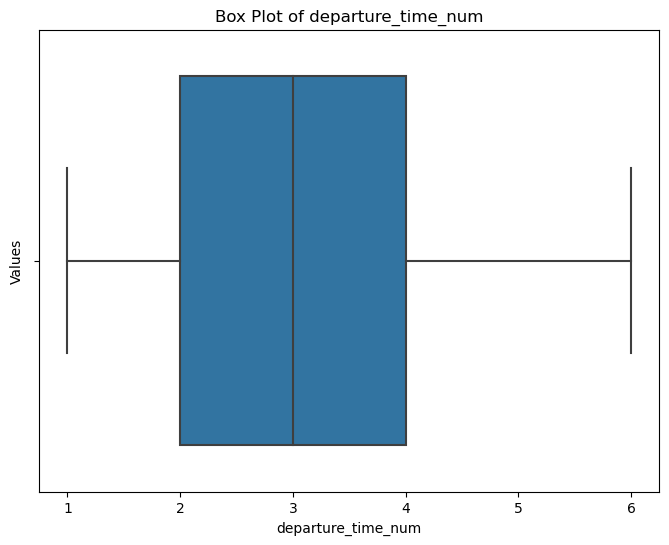

C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


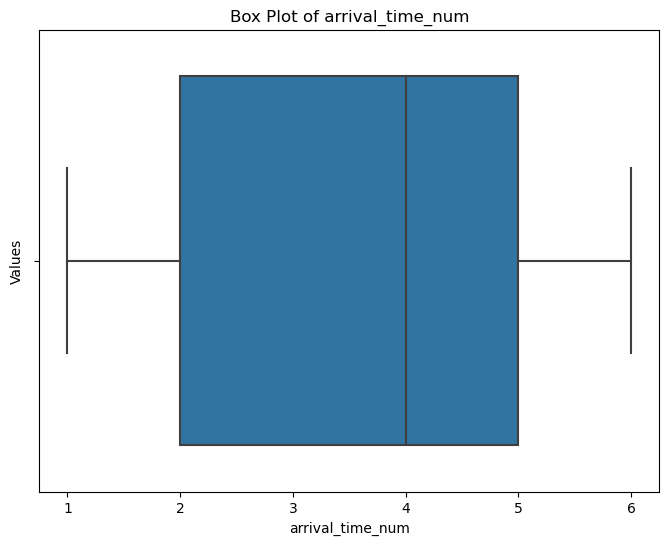

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select independent variables (features) for box plots
independent_variables = ['duration', 'days_left', 'stops', 'departure_time_num', 'arrival_time_num']

# Create box plots for each independent variable
for variable in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[variable])
    plt.title(f'Box Plot of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Values')
    plt.show()


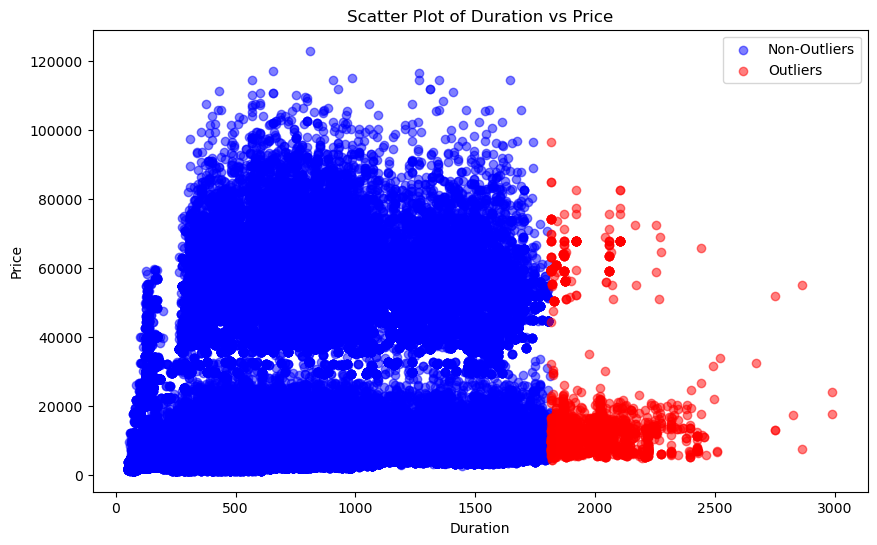

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the first and third quartiles
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]

# Create scatter plot with outliers in a different color
plt.figure(figsize=(10, 6))

# Plot non-outliers
plt.scatter(df.loc[~df.index.isin(outliers.index), 'duration'], 
            df.loc[~df.index.isin(outliers.index), 'price'], 
            color='blue', label='Non-Outliers', alpha=0.5)

# Plot outliers
plt.scatter(outliers['duration'], outliers['price'], 
            color='red', label='Outliers', alpha=0.5)

plt.title('Scatter Plot of Duration vs Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.legend()
plt.show()


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [39]:
# Update selected features to include additional features
selected_features = ['duration', 'days_left', 'class', 'source_city', 'destination_city', 'airline', 'departure_time_num', 'arrival_time_num']
X = df[selected_features]
y = df['price']

# Update categorical and numerical columns
categorical_cols = ['class', 'source_city', 'destination_city', 'airline']
numerical_cols = ['duration', 'days_left', 'departure_time_num', 'arrival_time_num']


In [40]:
# Update preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [41]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train, y_train)


Ridge()

In [42]:
# Predict on the test set
ridge_predictions = ridge_model.predict(X_test)


In [43]:
# Evaluate the model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Print evaluation metrics
print("Ridge Regression Model with Additional Features:")
print(f"RMSE: {ridge_rmse}")
print(f"R²: {ridge_r2}")


Ridge Regression Model with Additional Features:
RMSE: 7071.81764783259
R²: 0.9029828814520532


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define selected features
selected_features = ['duration', 'days_left', 'class', 'source_city', 'destination_city', 'airline', 'departure_time_num', 'arrival_time_num']
X = df[selected_features]
y = df['price']

# Define categorical and numerical columns
categorical_cols = ['class', 'source_city', 'destination_city', 'airline']
numerical_cols = ['duration', 'days_left', 'departure_time_num', 'arrival_time_num']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)

# Predict on the test set
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_predictions)

# Print evaluation metrics
print("Linear Regression Model with Additional Features:")
print(f"RMSE: {linear_rmse}")
print(f"R²: {linear_r2}")


Linear Regression Model with Additional Features:
RMSE: 7071.818589729463
R²: 0.9029828556085908


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define selected features
selected_features = ['duration', 'days_left', 'class', 'source_city', 'destination_city', 'airline', 'departure_time_num', 'arrival_time_num']
X = df[selected_features]
y = df['price']

# Define categorical and numerical columns
categorical_cols = ['class', 'source_city', 'destination_city', 'airline']
numerical_cols = ['duration', 'days_left', 'departure_time_num', 'arrival_time_num']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0)

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Print evaluation metrics
print("Lasso Regression Model with Additional Features:")
print(f"RMSE: {lasso_rmse}")
print(f"R²: {lasso_r2}")


Lasso Regression Model with Additional Features:
RMSE: 7071.795181788404
R²: 0.9029834978671019


In [46]:
# Update selected features to include additional features
selected_features = ['duration', 'days_left', 'class', 'source_city', 'destination_city', 'airline', 'departure_time_num', 'arrival_time_num']
X = df[selected_features]
y = df['price']

# Update numerical columns
numerical_cols = ['duration', 'days_left', 'departure_time_num', 'arrival_time_num']

# Update preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [47]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

# Print evaluation metrics
print("Random Forest Model with Additional Features:")
print(f"RMSE: {rf_rmse}")
print(f"R²: {rf_r2}")


Random Forest Model with Additional Features:
RMSE: 2843.8334312346233
R²: 0.9843110248416193


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define selected features
selected_features = ['duration', 'days_left', 'class', 'source_city', 'destination_city', 'airline', 'departure_time_num', 'arrival_time_num']
X = df[selected_features]
y = df['price']

# Define categorical and numerical columns
categorical_cols = ['class', 'source_city', 'destination_city', 'airline']
numerical_cols = ['duration', 'days_left', 'departure_time_num', 'arrival_time_num']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0)

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Print evaluation metrics
print("Lasso Regression Model with Additional Features:")
print(f"RMSE: {lasso_rmse}")
print(f"R²: {lasso_r2}")


Lasso Regression Model with Additional Features:
RMSE: 7071.795181788404
R²: 0.9029834978671019


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define selected features
selected_features = ['duration', 'days_left', 'class', 'source_city', 'destination_city', 'airline', 'departure_time_num', 'arrival_time_num']
X = df[selected_features]
y = df['price']

# Define categorical and numerical columns
categorical_cols = ['class', 'source_city', 'destination_city', 'airline']
numerical_cols = ['duration', 'days_left', 'departure_time_num', 'arrival_time_num']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

# Print evaluation metrics
print("Decision Tree Regression Model with Additional Features:")
print(f"RMSE: {dt_rmse}")
print(f"R²: {dt_r2}")


Decision Tree Regression Model with Additional Features:
RMSE: 3573.29639631409
R²: 0.9752300946305862


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define selected features
selected_features = ['duration', 'days_left', 'class', 'source_city', 'destination_city', 'airline', 'departure_time_num', 'arrival_time_num']
X = df[selected_features]
y = df['price']

# Define categorical and numerical columns
categorical_cols = ['class', 'source_city', 'destination_city', 'airline']
numerical_cols = ['duration', 'days_left', 'departure_time_num', 'arrival_time_num']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Print evaluation metrics
print("XGBoost Regression Model with Additional Features:")
print(f"RMSE: {xgb_rmse}")
print(f"R²: {xgb_r2}")


XGBoost Regression Model with Additional Features:
RMSE: 3618.6244863392717
R²: 0.974597684838944


In [61]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Example data: we will create some synthetic data for demonstration
# Features (X) and target (y)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel()

# Adding noise to the target
y[::5] += 1.5 * (0.5 - np.random.rand(20))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Machine (SVM) regression model
svm_model = SVR(kernel='rbf')  # You can specify different kernels like 'linear', 'poly', 'rbf', etc.
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Evaluate the model
mse_train_svm = mean_squared_error(y_train, y_pred_train_svm)
mse_test_svm = mean_squared_error(y_test, y_pred_test_svm)
rmse_train_svm = np.sqrt(mse_train_svm)
rmse_test_svm = np.sqrt(mse_test_svm)
r2_train_svm = r2_score(y_train, y_pred_train_svm)
r2_test_svm = r2_score(y_test, y_pred_test_svm)

print("Support Vector Machine (SVM) Regression:")
print(f"Root Mean Squared Error (RMSE) on Training Set: {rmse_train_svm:.2f}")
print(f"R-squared on Training Set: {r2_train_svm:.2f}")


Support Vector Machine (SVM) Regression:
Root Mean Squared Error (RMSE) on Training Set: 0.16
R-squared on Training Set: 0.95


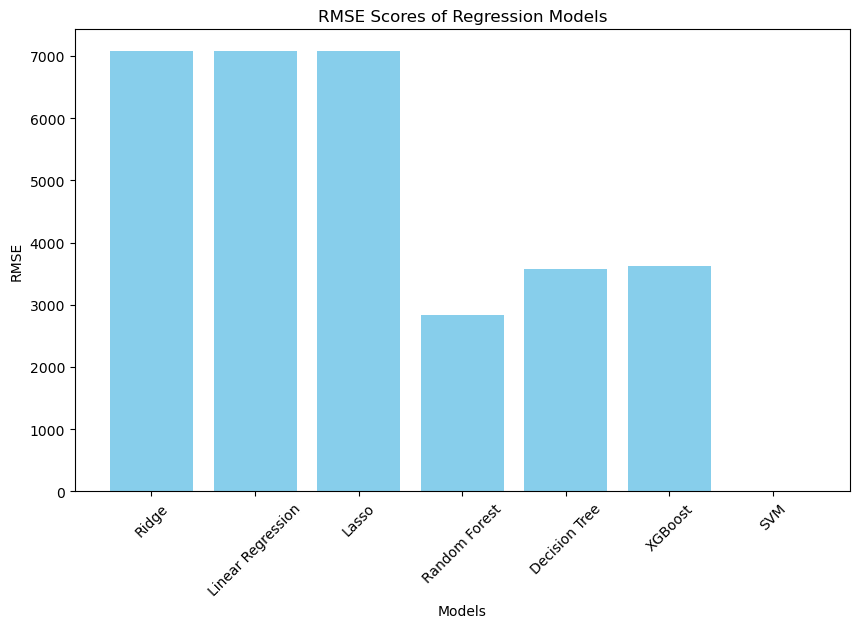

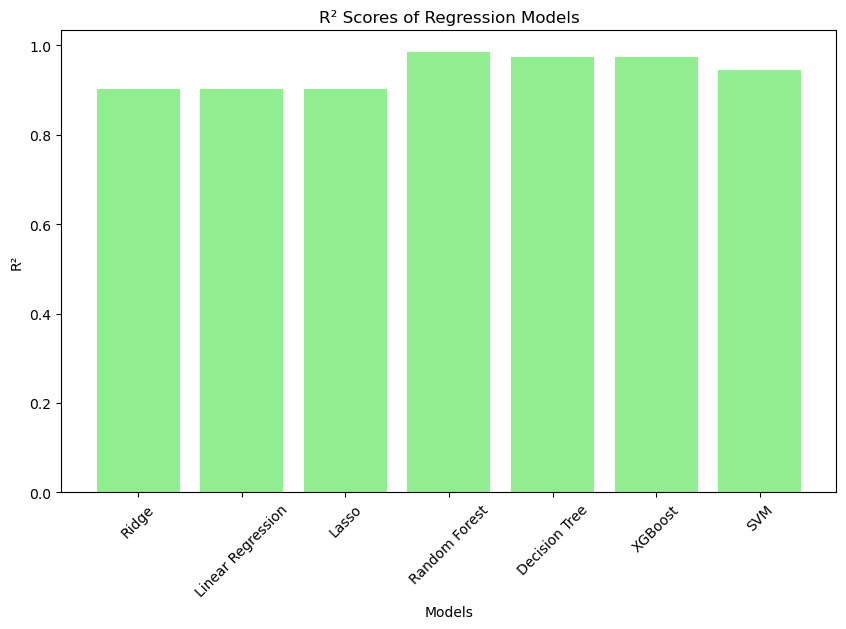

In [62]:
import matplotlib.pyplot as plt

# Define model names
model_names = ['Ridge', 'Linear Regression', 'Lasso', 'Random Forest', 'Decision Tree', 'XGBoost','SVM']

# Define evaluation metrics for each model
rmse_scores = [ridge_rmse, linear_rmse, lasso_rmse, rf_rmse, dt_rmse, xgb_rmse, rmse_train_svm]
r2_scores = [ridge_r2, linear_r2, lasso_r2, rf_r2, dt_r2, xgb_r2,r2_train_svm ]

# Plot RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.title('RMSE Scores of Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

# Plot R² scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='lightgreen')
plt.title('R² Scores of Regression Models')
plt.xlabel('Models')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.show()


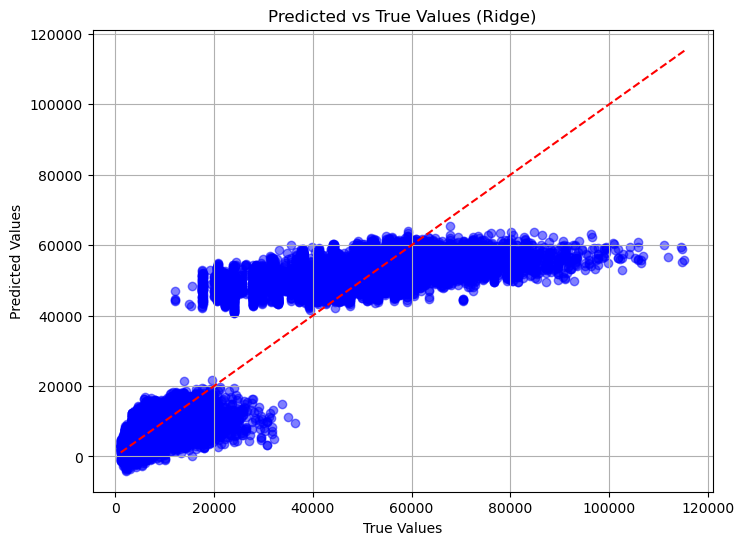

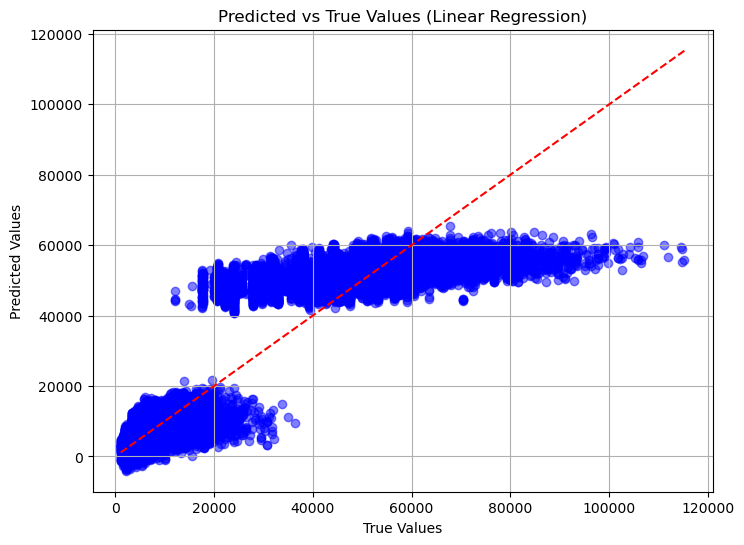

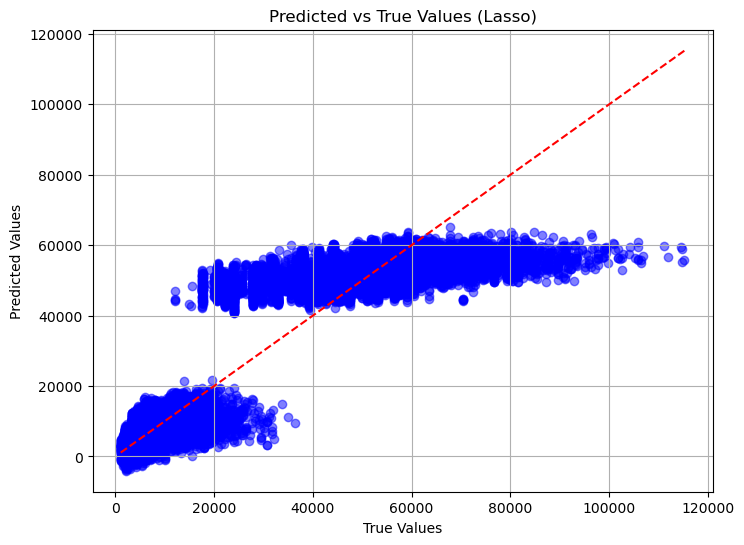

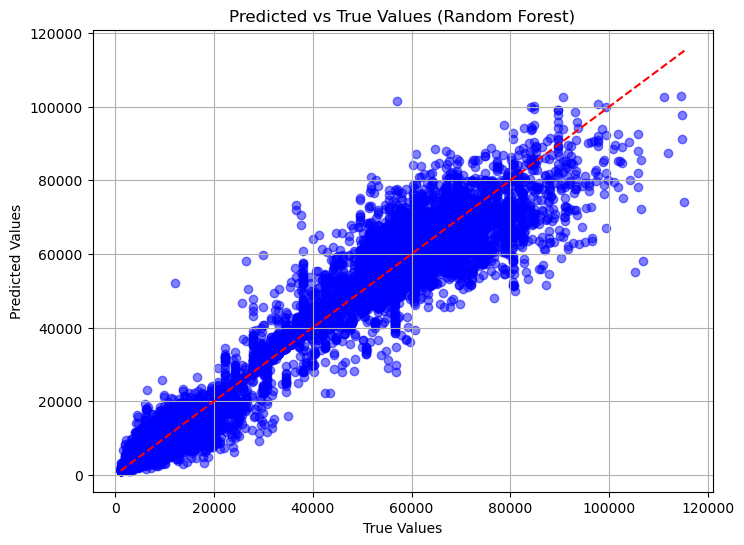

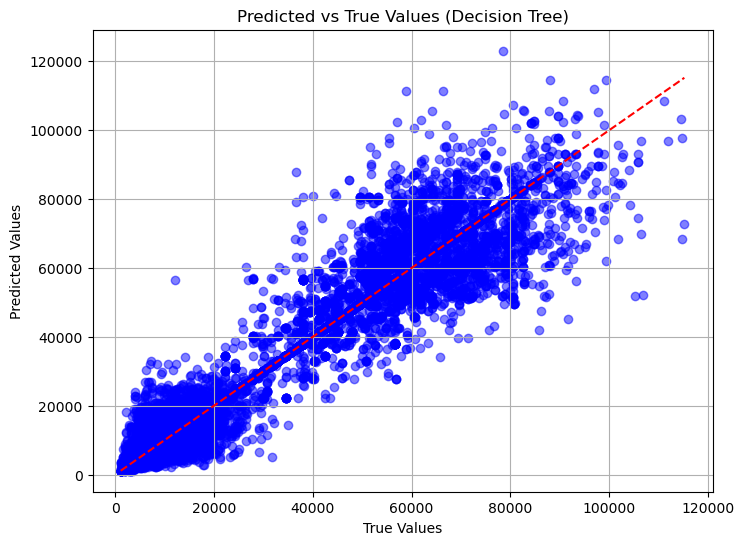

In [58]:
# Define a function to plot predicted vs true values
def plot_predicted_vs_true(model_name, y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predicted vs True Values ({model_name})')
    plt.grid(True)
    plt.show()

# Plot for each model
for model_name, y_pred in models.items():
    plot_predicted_vs_true(model_name, y_test, y_pred)
